In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

import gc
from tqdm import tqdm

# Goal
This data challenge involves classification task. The target variable is whether a customer will click 'Buy' on a website. Buy = 0 and Buy = 1 indicate 'no' and 'yes' respectively. Independent variables capture customer background and customer website navigation behavior information. First variable in the train.csv data file identifies each customer uniquely.

The challenge is to correctly predict if a customer will click 'buy' on a website.

In [2]:
train = pd.read_csv('../input/classification-data-challenge/train.csv')
test = pd.read_csv('../input/classification-data-challenge/test.csv')

sub = pd.read_csv('../input/classification-data-challenge/submission.csv')

print(train.shape)
print(test.shape)


(4107, 87)
(1715, 86)


In [3]:
train

,Id,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,Buy
0,1,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,6,23,1,2,1,5,0,5,0,5,0,6,3,3,5,2,0,5,4,2,0,0,4,2,2,2,2,2,4,2,9,0,5,3,3,9,0,5,2,3,0,0,3,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4102,5816,13,1,2,3,3,0,2,0,7,5,2,3,3,3,5,2,4,4,2,0,0,2,2,4,2,2,1,4,2,9,0,6,0,3,7,2,3,4,3,0,0,4,6,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4103,5818,36,1,1,2,8,0,6,1,2,1,2,6,5,3,2,2,5,2,2,0,0,4,1,3,2,3,3,3,0,9,0,5,1,3,5,4,4,3,3,0,0,3,3,2,0,0,6,0,4,0,0,0,0,0,3,0,0,0,3,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0
4104,5819,35,1,4,4,8,1,4,1,4,6,0,3,2,2,5,0,0,9,2,1,1,3,3,2,0,4,5,0,0,3,6,6,1,2,6,3,0,9,0,0,0,4,5,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4105,5820,33,1,3,4,8,0,6,0,3,5,1,4,3,3,4,0,1,8,1,0,0,2,3,5,1,1,1,4,4,7,2,4,0,5,8,1,5,3,1,1,0,3,3,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [4]:
test.duplicated().sum()

0

In [5]:
def eda(df):
    summary = pd.DataFrame()
    summary['dtype'] = df.dtypes
    summary['miss'] = df.isnull().sum()
    summary['nlevel'] = df.nunique()
    return summary

eda(train).T

,Id,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,Buy
dtype,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
miss,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
nlevel,4107,40,7,5,6,10,10,10,6,10,10,8,10,10,10,10,10,10,10,10,6,10,10,10,10,10,10,10,10,9,10,10,10,8,10,10,10,10,10,10,9,7,10,8,4,7,4,5,4,6,3,5,5,5,5,10,6,3,5,9,3,6,2,5,5,3,3,2,7,5,4,4,4,5,4,3,6,2,2,3,7,2,3,3,3,3,2


In [6]:
eda(test).T

,Id,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
dtype,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
miss,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
nlevel,1715,38,6,5,6,10,9,10,6,10,10,7,10,10,10,10,10,10,10,10,6,9,10,10,10,10,10,8,10,8,10,10,10,7,10,10,10,10,10,10,9,6,10,8,3,6,4,5,4,5,3,5,5,5,6,7,5,3,2,8,1,5,2,7,4,2,2,2,4,4,3,2,4,4,4,3,5,2,2,3,5,1,3,4,2,2


# Target

In [7]:
train['Buy'].value_counts()

0    3859
1     248
Name: Buy, dtype: int64

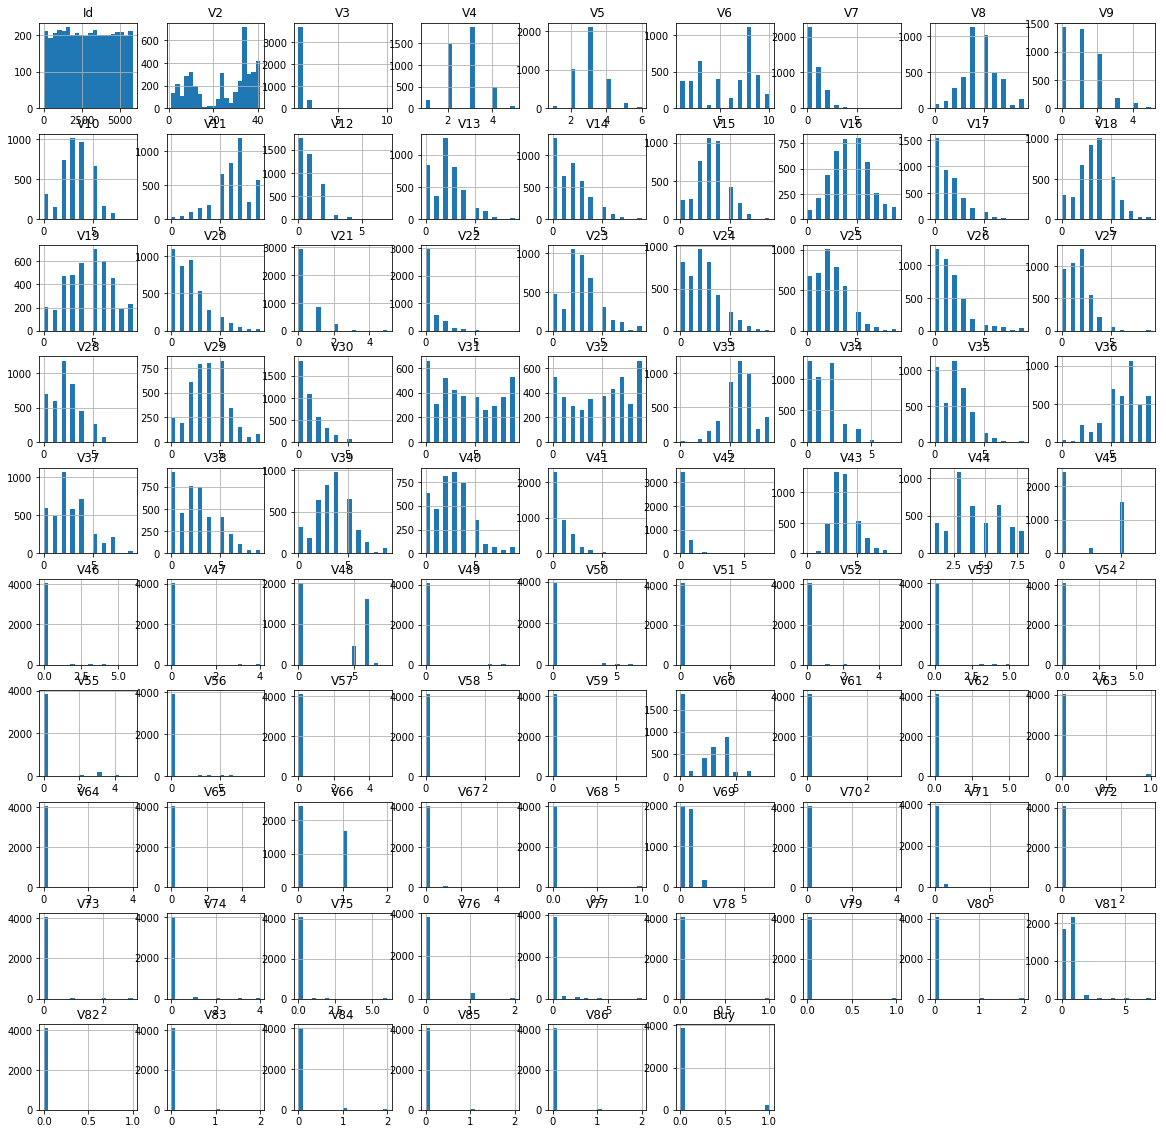

In [8]:
train.hist(figsize = (20,20), bins = 20)
plt.show()

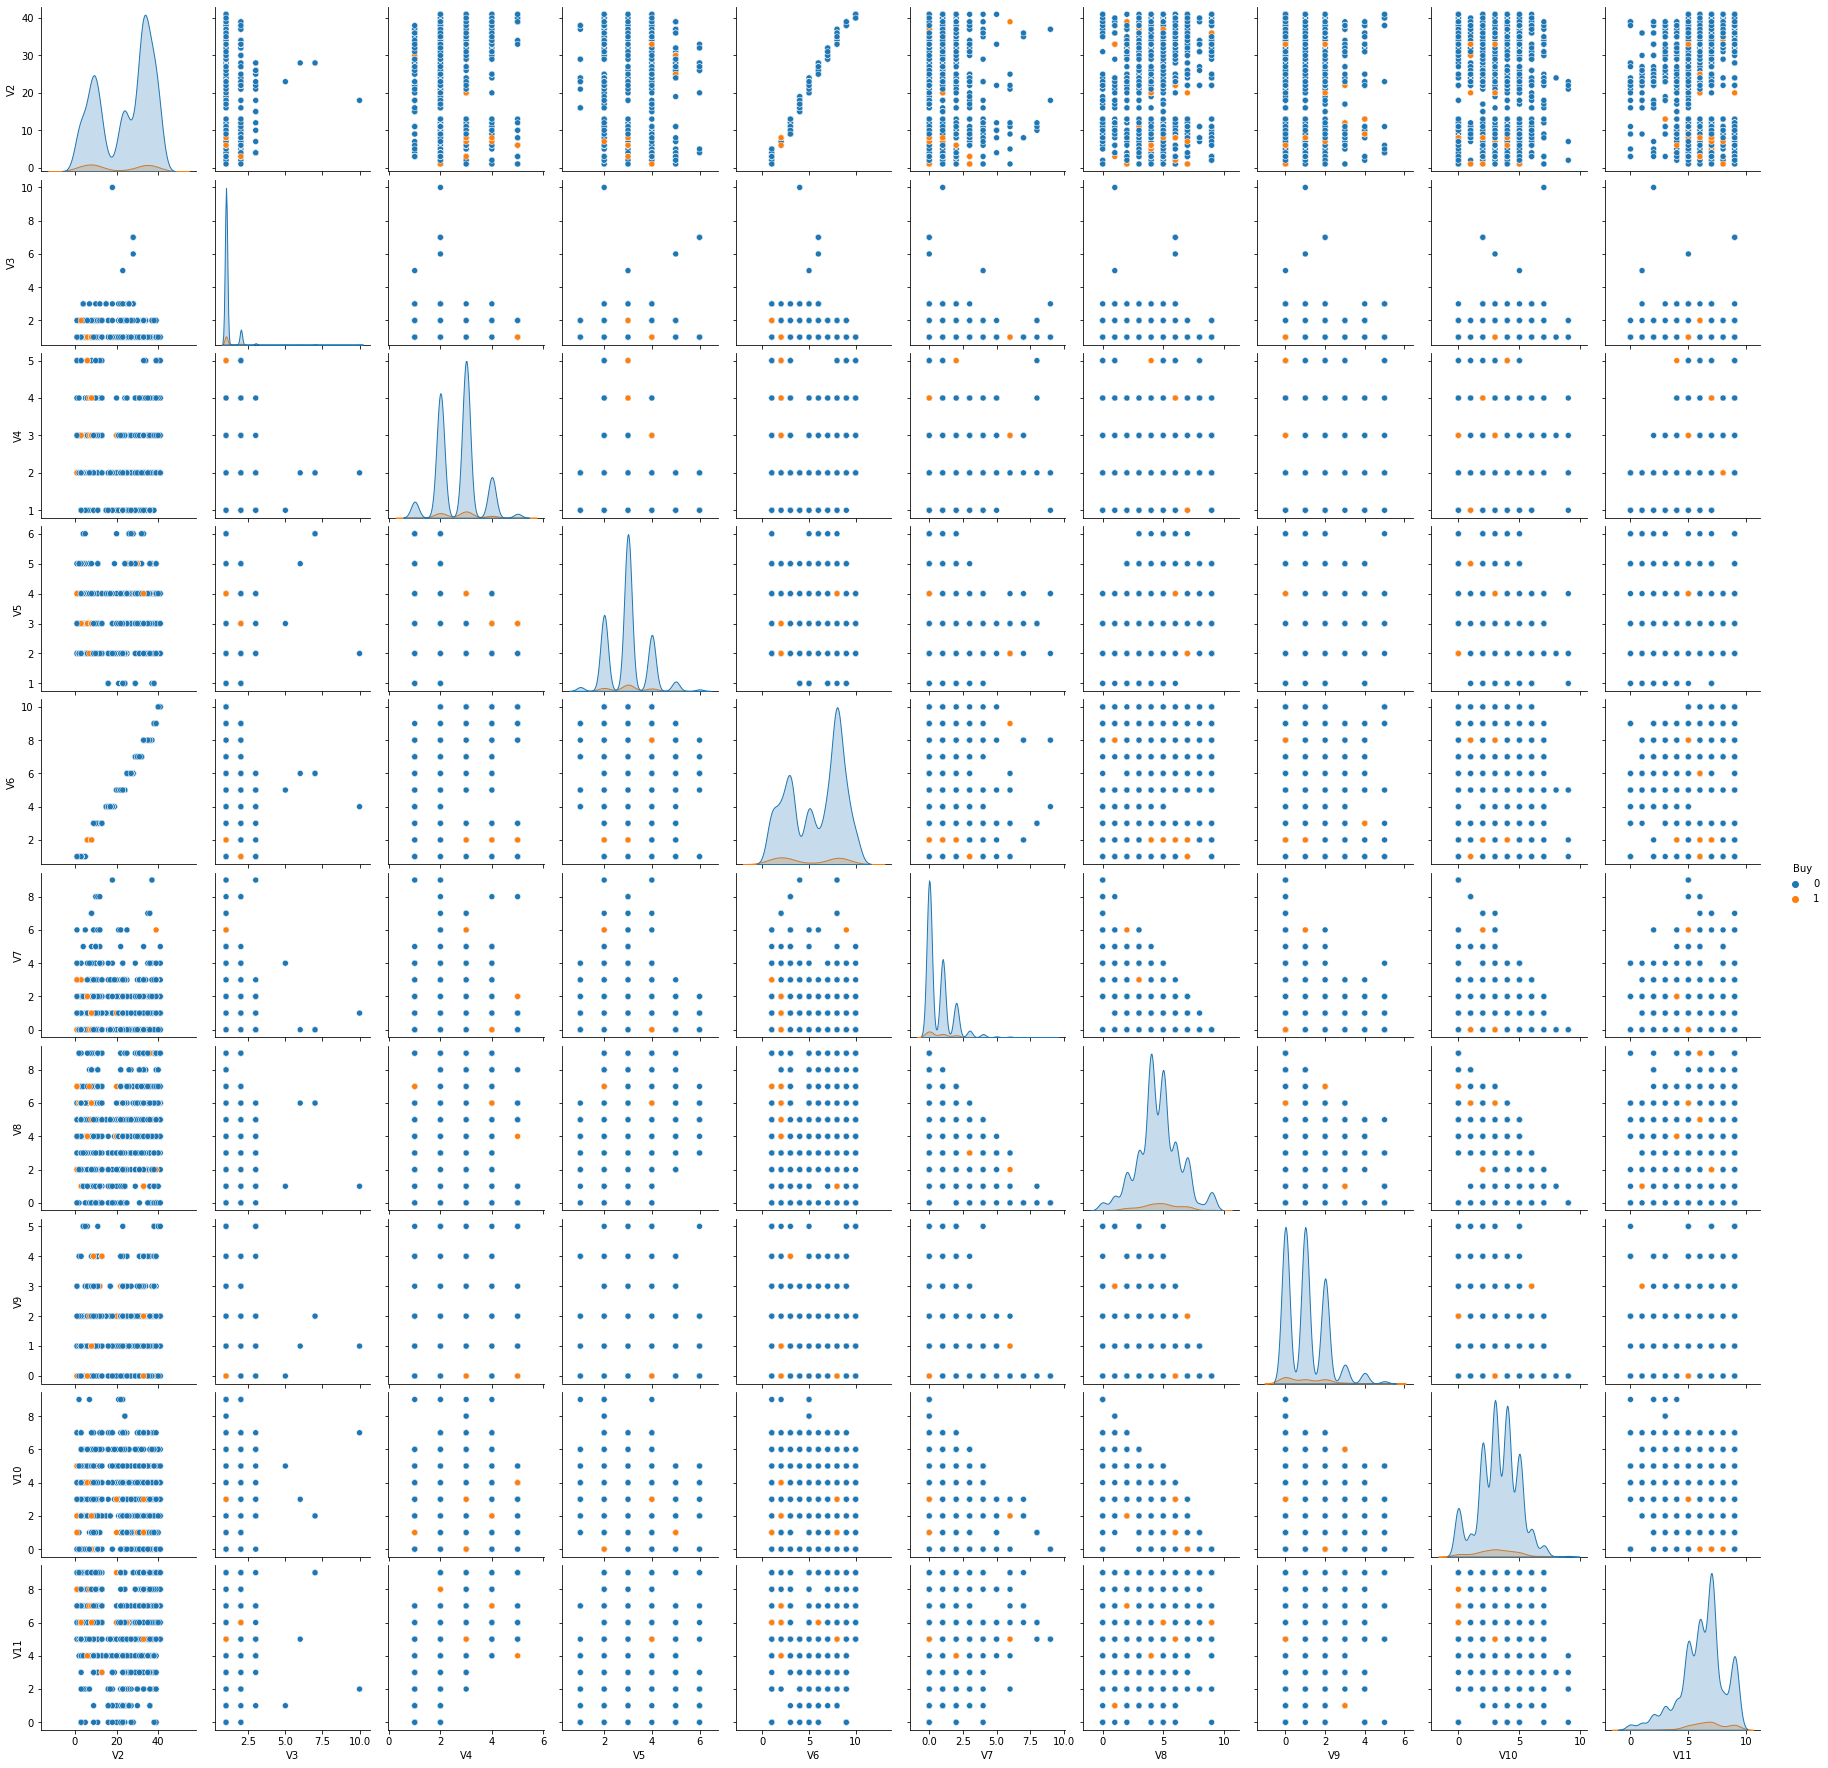

In [9]:
sns.pairplot(train.iloc[:,[1,2,3,4,5,6,7,8,9,10,-1]], hue = 'Buy')
plt.show()

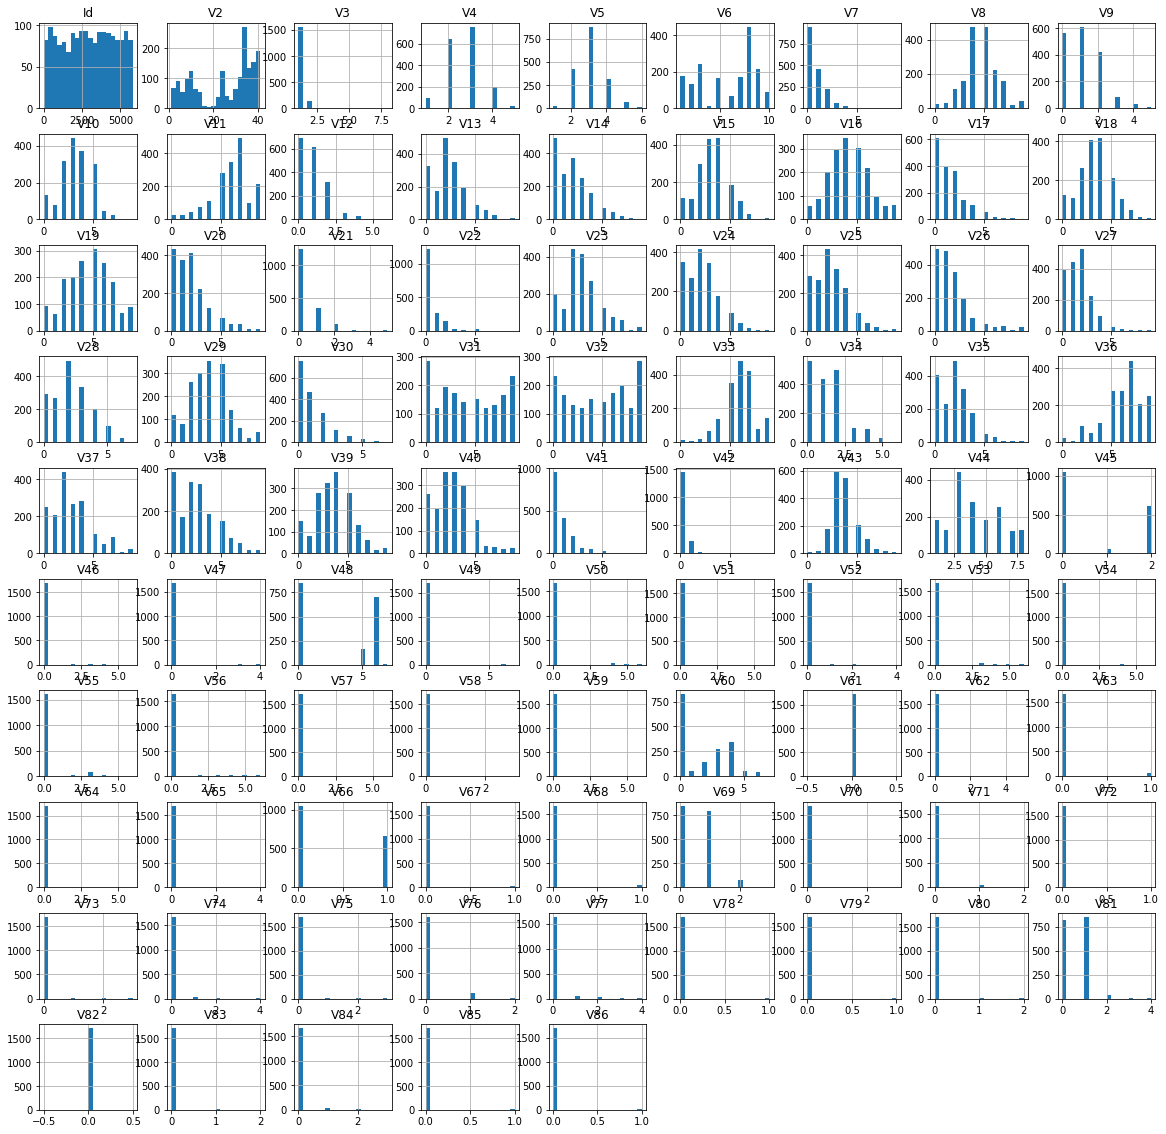

In [10]:
test.hist(figsize = (20,20), bins = 20)
plt.show()

In [11]:
train.V48.value_counts()

0    1998
6    1621
5     453
7      32
8       3
Name: V48, dtype: int64

In [12]:
test.V48.value_counts()

0    847
6    698
5    160
7      9
4      1
Name: V48, dtype: int64

In [13]:
train.groupby('V48')['Buy'].mean()

V48
0    0.025025
5    0.024283
6    0.115361
7    0.000000
8    0.000000
Name: Buy, dtype: float64

# Correlation Analysis

In [14]:
train.corr()['Buy'].abs().sort_values(ascending = False)[:30]

Buy    1.000000
V83    0.156455
V48    0.153422
V69    0.141662
V62    0.137874
V44    0.100881
V43    0.100674
V17    0.094038
V19    0.093743
V45    0.091047
V60    0.086303
V38    0.082602
V66    0.081347
V31    0.078772
V86    0.078570
V32    0.077900
V2     0.077316
V35    0.076628
V6     0.075875
V41    0.071340
V65    0.069814
V26    0.069003
V36    0.068036
V33    0.067783
V11    0.067428
V37    0.067109
V20    0.065525
V40    0.063148
V25    0.059413
V30    0.059166
Name: Buy, dtype: float64

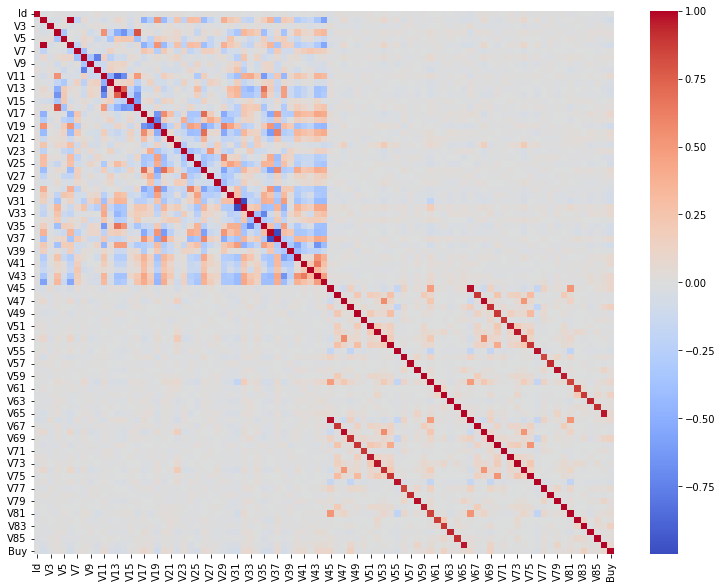

In [15]:
plt.figure(figsize = (13,10))
sns.heatmap(train.corr(), cmap = 'coolwarm')
plt.show()

# Columns with high correlation

In [16]:
thr = 0.95
corr_matrix = train.drop(['Id','Buy'], axis = 1).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))

to_drop = [c for c in upper.columns if any(upper[c] > thr)]
to_drop

['V6', 'V32', 'V37', 'V66', 'V68', 'V72', 'V73', 'V76', 'V79', 'V80', 'V86']

In [17]:
fea = [f for f in train.columns if 'V' in f and (f not in to_drop)]
print(len(fea))

74


# Target v.s. Features

64it [00:00, 121.90it/s]


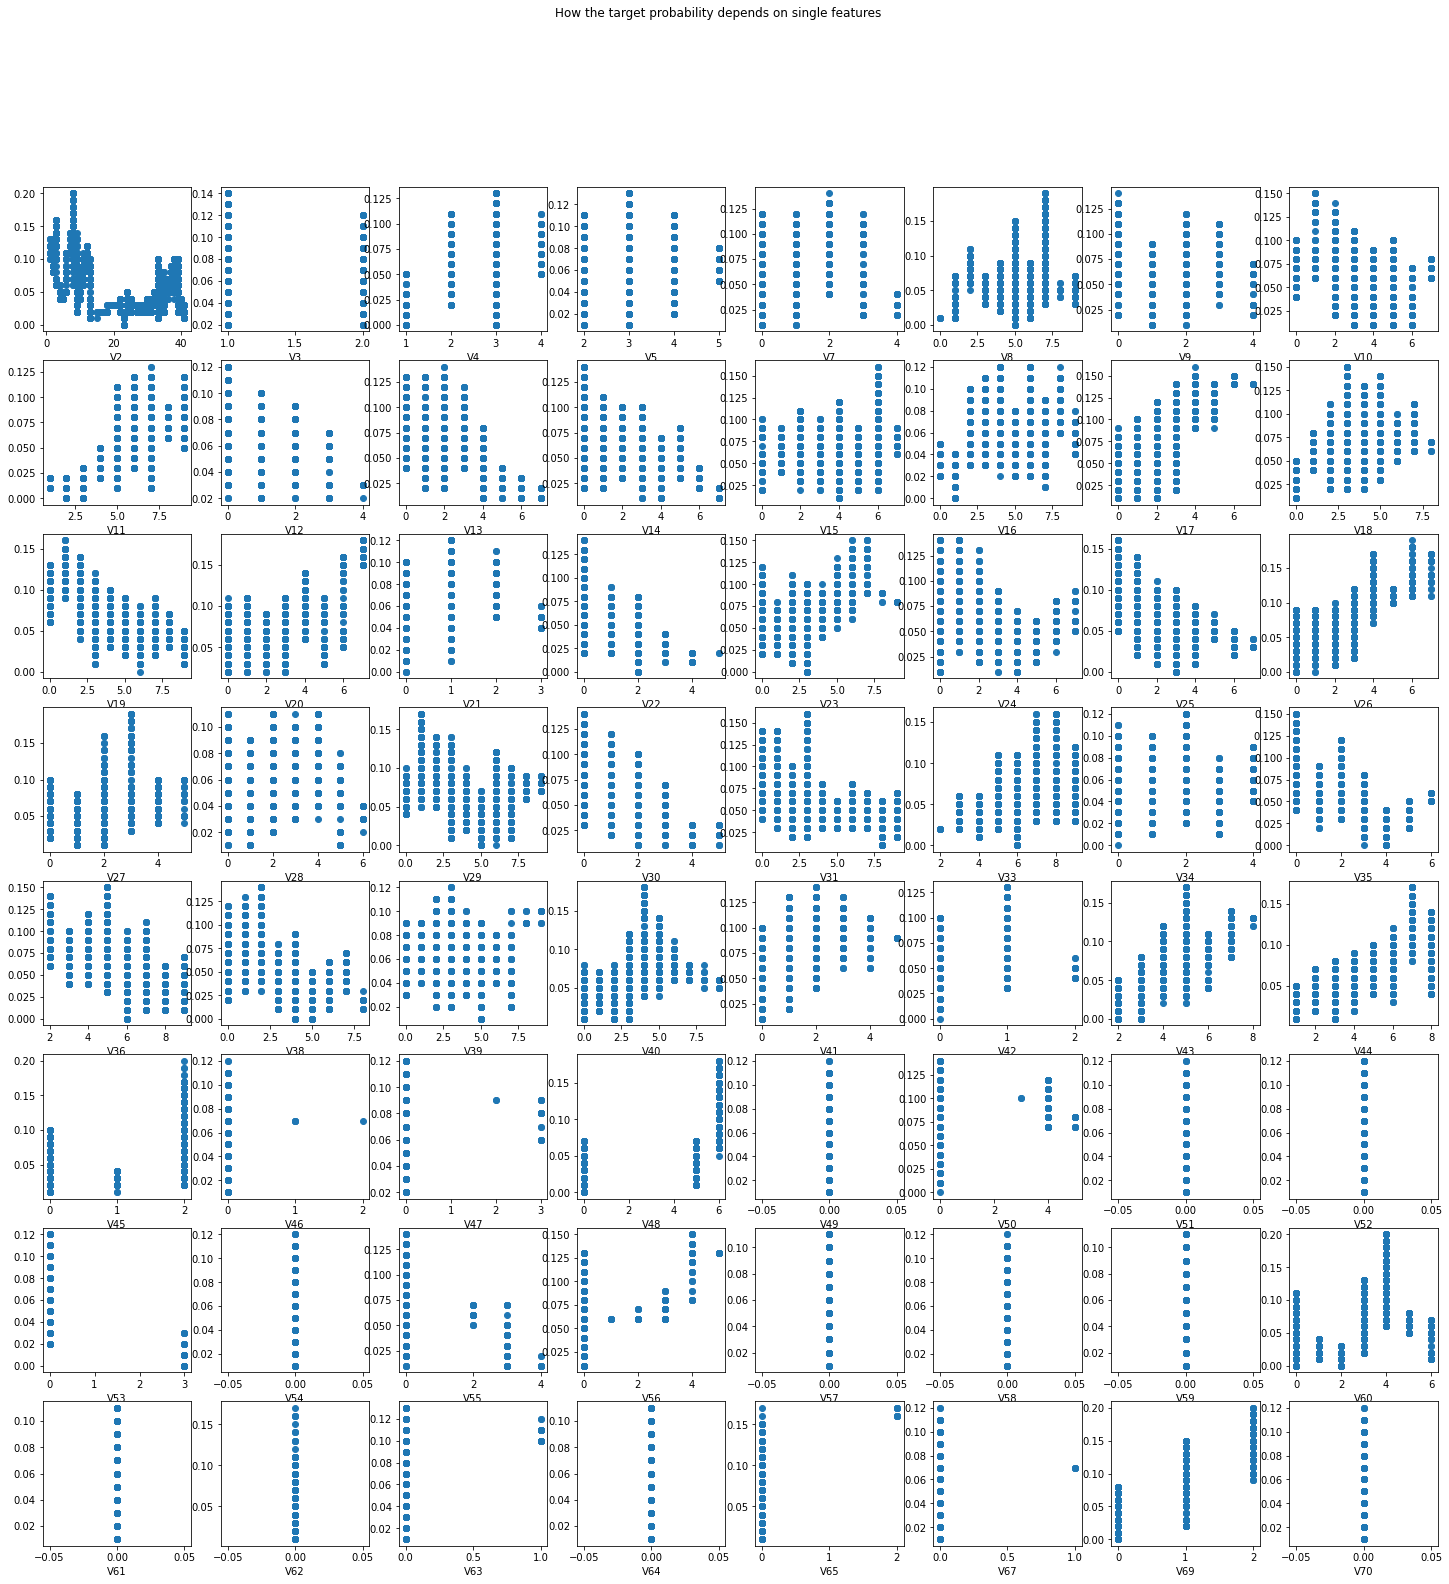

CPU times: user 6.97 s, sys: 252 ms, total: 7.22 s
Wall time: 7 s


In [18]:
%%time

fig, axe = plt.subplots(8,8, figsize = (25,25))
for f, ax in tqdm(zip(fea, axe.ravel())):
    tmp = train[[f, 'Buy']].sort_values(by = f)
    ax.scatter(tmp[f], tmp.Buy.rolling(100, center = True).mean())
    ax.set_xlabel(f'{f}')
plt.suptitle('How the target probability depends on single features')
plt.show()    

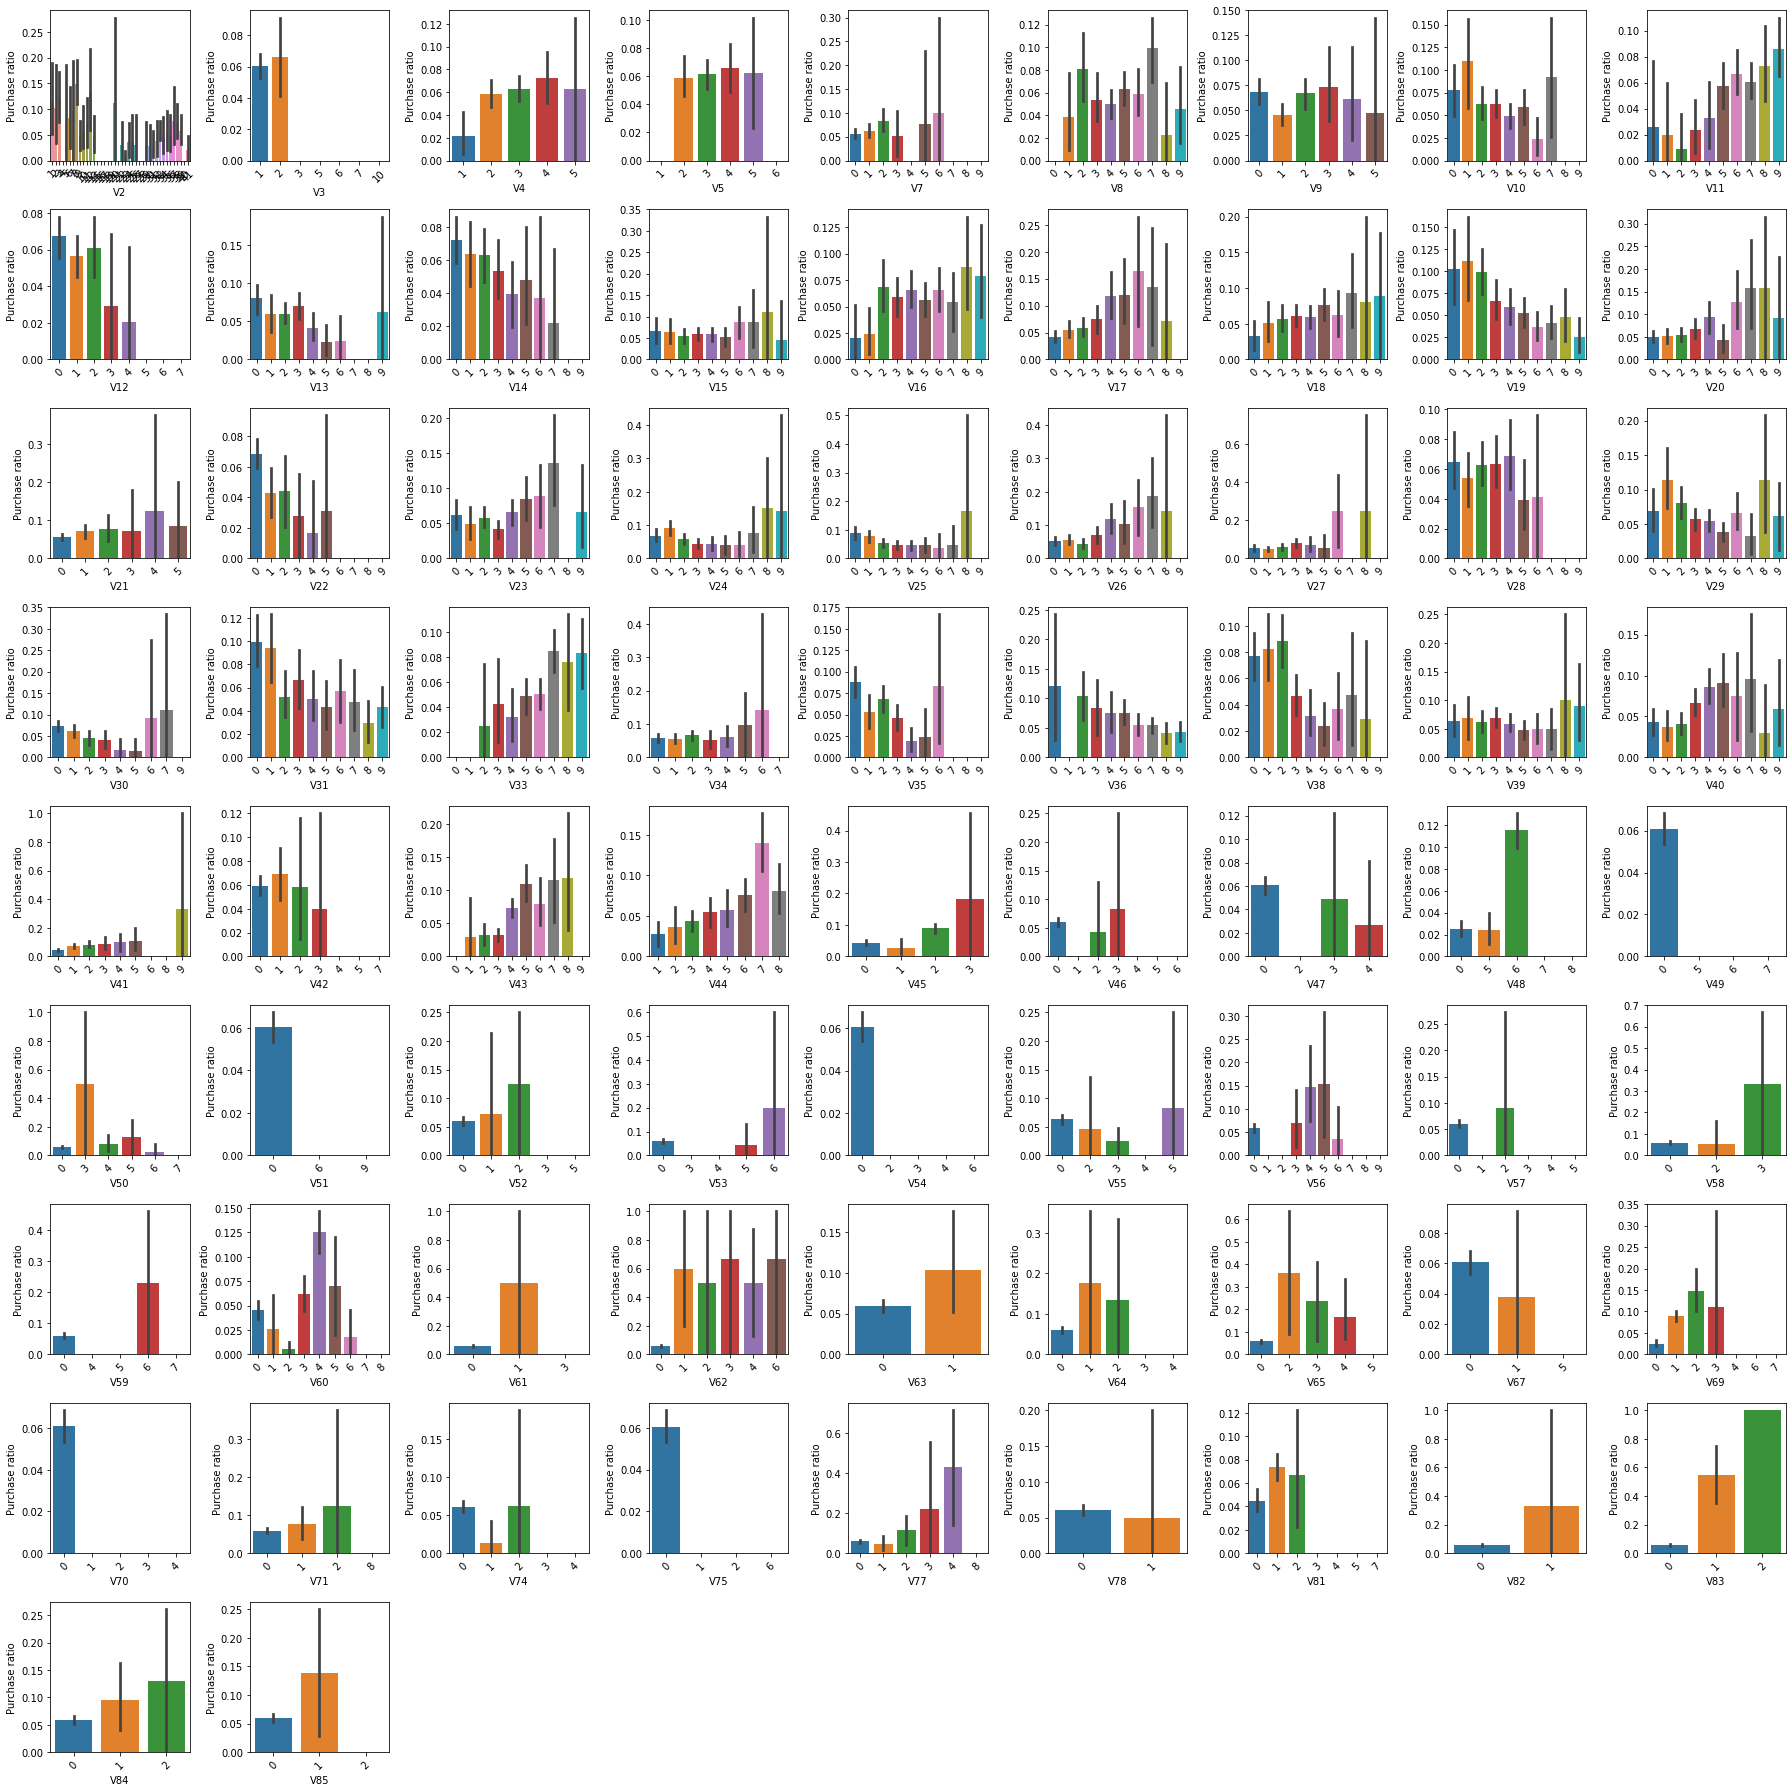

In [19]:

def draw_barplot(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(25,25))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        ax=sns.barplot(x = feature, y = dataframe['Buy'], data = dataframe)     
        ax.set(xlabel=feature)
        ax.set(ylabel='Purchase ratio')
        plt.xticks(rotation=45)
    fig.tight_layout()  
    
    plt.show()
    
draw_barplot(train, fea,9,9)

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df = pd.concat([train, test])

for c in fea:
    df[c] = le.fit_transform(df[c])
    

# FE

In [21]:
######################### Freq encoding

for col in fea:    
    fq_encode = df[col].value_counts(dropna= True, normalize = True).to_dict()   
    df[col+'_fq_enc'] = df[col].map(fq_encode)

# df['V2_48_mean'] = df.groupby('V48')['V2'].transform('mean').fillna(0)  
# df['V2_48_std'] = df.groupby('V48')['V2'].transform('std').fillna(0)

df.head()    

,Id,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,Buy,V2_fq_enc,V3_fq_enc,V4_fq_enc,V5_fq_enc,V7_fq_enc,V8_fq_enc,V9_fq_enc,V10_fq_enc,V11_fq_enc,V12_fq_enc,V13_fq_enc,V14_fq_enc,V15_fq_enc,V16_fq_enc,V17_fq_enc,V18_fq_enc,V19_fq_enc,V20_fq_enc,V21_fq_enc,V22_fq_enc,V23_fq_enc,V24_fq_enc,V25_fq_enc,V26_fq_enc,V27_fq_enc,V28_fq_enc,V29_fq_enc,V30_fq_enc,V31_fq_enc,V33_fq_enc,V34_fq_enc,V35_fq_enc,V36_fq_enc,V38_fq_enc,V39_fq_enc,V40_fq_enc,V41_fq_enc,V42_fq_enc,V43_fq_enc,V44_fq_enc,V45_fq_enc,V46_fq_enc,V47_fq_enc,V48_fq_enc,V49_fq_enc,V50_fq_enc,V51_fq_enc,V52_fq_enc,V53_fq_enc,V54_fq_enc,V55_fq_enc,V56_fq_enc,V57_fq_enc,V58_fq_enc,V59_fq_enc,V60_fq_enc,V61_fq_enc,V62_fq_enc,V63_fq_enc,V64_fq_enc,V65_fq_enc,V67_fq_enc,V69_fq_enc,V70_fq_enc,V71_fq_enc,V74_fq_enc,V75_fq_enc,V77_fq_enc,V78_fq_enc,V81_fq_enc,V82_fq_enc,V83_fq_enc,V84_fq_enc,V85_fq_enc
0,1,31,0,2,1,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.139127,0.904672,0.454483,0.249399,0.554449,0.257815,0.345929,0.249571,0.289076,0.420474,0.301615,0.163346,0.182068,0.134490,0.227070,0.160941,0.109928,0.213844,0.71642,0.146685,0.256098,0.053246,0.247166,0.269495,0.254208,0.287874,0.083648,0.268464,0.073514,0.044830,0.318447,0.133288,0.120062,0.223978,0.232910,0.085538,0.557540,0.841635,0.318447,0.261766,0.598076,0.985915,0.979389,0.398317,0.991755,0.961869,0.998454,0.988835,0.975438,0.996393,0.931982,0.949674,0.994675,0.993473,0.996049,0.025593,0.999485,0.994332,0.974751,0.992271,0.985915,0.985915,0.465819,0.991755,0.961869,0.975438,0.996393,0.949674,0.994675,0.518207,0.999485,0.994332,0.974751,0.992271
1,2,35,0,1,1,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.022673,0.904672,0.366025,0.249399,0.274648,0.276022,0.345929,0.229131,0.201305,0.184644,0.301615,0.301786,0.249914,0.189969,0.368774,0.126761,0.146170,0.261766,0.71642,0.717279,0.074030,0.200447,0.132600,0.298523,0.306252,0.201821,0.200618,0.447784,0.123154,0.242700,0.252147,0.279114,0.150292,0.187908,0.079869,0.085538,0.126417,0.841635,0.125902,0.154930,0.365510,0.985915,0.979389,0.488664,0.991755,0.961869,0.998454,0.988835,0.975438,0.996393,0.931982,0.949674,0.994675,0.993473,0.996049,0.091893,0.999485,0.994332,0.974751,0.992271,0.985915,0.985915,0.488664,0.991755,0.961869,0.975438,0.996393,0.949674,0.994675,0.518207,0.999485,0.994332,0.974751,0.992271
2,3,35,0,1,1,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,3,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.022673,0.904672,0.366025,0.249399,0.554449,0.276022,0.238406,0.229131,0.042254,0.184644,0.111302,0.089145,0.249914,0.109069,0.368774,0.126761,0.146170,0.261766,0.71642,0.717279,0.030574,0.200447,0.247166,0.298523,0.013397,0.170045,0.199072,0.447784,0.072999,0.242700,0.318447,0.279114,0.146341,0.102886,0.159911,0.153040,0.557540,0.841635,0.331845,0.154930,0.365510,0.985915,0.979389,0.398317,0.991755,0.961869,0.998454,0.988835,0.975438,0.996393,0.931982,0.949674,0.994675,0.993473,0.996049,0.091893,0.999485,0.994332,0.974751,0.992271,0.985915,0.985915,0.465819,0.991755,0.961869,0.975438,0.996393,0.949674,0.994675,0.518207,0.999485,0.994332,0.974751,0.992271
3,4,8,0,2,2,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,3,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.047750,0.904672,0.454483,0.515287,0.125902,0.101340,0.238406,0.229131,0.162487,0.184644,0.301615,0.214188,0.257300,0.195294,0.093954,0.244933

In [22]:

train = df[:len(train)]
test = df[-len(test):]

X_train = train.drop(['Id','Buy'], axis = 1)
y_train = train.Buy

X_test = test.drop(['Id', 'Buy'], axis = 1)
print(X_train.shape)
print(X_test.shape)

(4107, 159)
(1715, 159)


# Modeling

In [23]:
import lightgbm as lgb
from sklearn.linear_model import LogisticRegressionCV

from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold, train_test_split

from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train,test_size = 0.2, shuffle = True, random_state = 22)
print(X_tr.shape)
print(X_val.shape)
print(y_tr.shape)
print(y_val.shape)

(3285, 159)
(822, 159)
(3285,)
(822,)


# Logistic Regression with 'balanced'

In [24]:
lr = LogisticRegressionCV( class_weight = 'balanced', random_state = 222, cv=3)
lr.fit(X_tr, y_tr)
y_test = lr.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_test)
print(auc)

0.7859872611464969


In [25]:
print('accuracy score: \n', accuracy_score(y_val, lr.predict(X_val)), '\n')

print('auc score: \n', roc_auc_score(y_val, lr.predict_proba(X_val)[:,1]), '\n')

print('classification report \n', classification_report(y_val, lr.predict(X_val)), '\n')

print('confusion matrix \n', confusion_matrix(y_val, lr.predict(X_val)), '\n')

accuracy score: 
 0.7372262773722628 

auc score: 
 0.7859872611464969 

classification report 
               precision    recall  f1-score   support

         0.0       0.98      0.74      0.84       785
         1.0       0.12      0.73      0.20        37

    accuracy                           0.74       822
   macro avg       0.55      0.73      0.52       822
weighted avg       0.94      0.74      0.81       822
 

confusion matrix 
 [[579 206]
 [ 10  27]] 



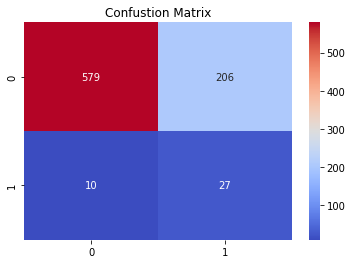

In [26]:
sns.heatmap(confusion_matrix(y_val, lr.predict(X_val)), annot = True, cmap = 'coolwarm', fmt='g')
plt.title('Confustion Matrix')
plt.show()

# LGBM with 'balanced'

In [27]:
clf = lgb.LGBMClassifier(
learning_rate = 0.0001,
    n_estimators = 1000,
    subsample = 0.8,
    colsample_bytree = 0.5,
    reg_alpha = 0.5,
    reg_lambda = 0.5,
    importance_type= 'gain',
    class_weight = 'balanced',

)

clf.fit(X_tr, y_tr, eval_set = [(X_tr, y_tr),(X_val, y_val)], early_stopping_rounds= 200, categorical_feature = fea,
       verbose=50, eval_metric= 'auc')


[50]	training's auc: 0.935201	training's binary_logloss: 0.691192	valid_1's auc: 0.823291	valid_1's binary_logloss: 0.69134
[100]	training's auc: 0.937142	training's binary_logloss: 0.689234	valid_1's auc: 0.828938	valid_1's binary_logloss: 0.689544
[150]	training's auc: 0.939009	training's binary_logloss: 0.687308	valid_1's auc: 0.827871	valid_1's binary_logloss: 0.687791
[200]	training's auc: 0.938475	training's binary_logloss: 0.685392	valid_1's auc: 0.82608	valid_1's binary_logloss: 0.686063
[250]	training's auc: 0.940834	training's binary_logloss: 0.683535	valid_1's auc: 0.825701	valid_1's binary_logloss: 0.684362
[300]	training's auc: 0.941443	training's binary_logloss: 0.681644	valid_1's auc: 0.824255	valid_1's binary_logloss: 0.682626


LGBMClassifier(class_weight='balanced', colsample_bytree=0.5,
               importance_type='gain', learning_rate=0.0001, n_estimators=1000,
               reg_alpha=0.5, reg_lambda=0.5, subsample=0.8)

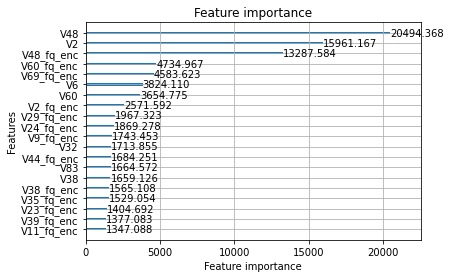

In [28]:
lgb.plot_importance(clf, max_num_features=20)

plt.show()

In [29]:
print('accuracy score: \n', accuracy_score(y_val, clf.predict(X_val)), '\n')

print('auc score: \n', roc_auc_score(y_val, clf.predict_proba(X_val)[:,1]), '\n')

print('classification report \n', classification_report(y_val, clf.predict(X_val)), '\n')

print('confusion matrix \n', confusion_matrix(y_val, clf.predict(X_val)), '\n')

accuracy score: 
 0.7785888077858881 

auc score: 
 0.8299018763986918 

classification report 
               precision    recall  f1-score   support

         0.0       0.98      0.78      0.87       785
         1.0       0.12      0.65      0.21        37

    accuracy                           0.78       822
   macro avg       0.55      0.72      0.54       822
weighted avg       0.94      0.78      0.84       822
 

confusion matrix 
 [[616 169]
 [ 13  24]] 



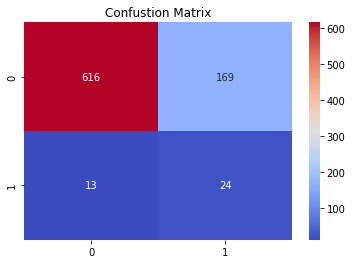

In [30]:
sns.heatmap(confusion_matrix(y_val, clf.predict(X_val)), annot = True, cmap = 'coolwarm', fmt='g')
plt.title('Confustion Matrix')
plt.show()

# LGBM with SMOTE

In [31]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smt = SMOTE(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_tr, y_tr)

print('Before', Counter(y_train))
print('After', Counter(y_train_smt))

X_train_smt.head()

Before Counter({0.0: 3859, 1.0: 248})
After Counter({0.0: 3074, 1.0: 3074})


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V2_fq_enc,V3_fq_enc,V4_fq_enc,V5_fq_enc,V7_fq_enc,V8_fq_enc,V9_fq_enc,V10_fq_enc,V11_fq_enc,V12_fq_enc,V13_fq_enc,V14_fq_enc,V15_fq_enc,V16_fq_enc,V17_fq_enc,V18_fq_enc,V19_fq_enc,V20_fq_enc,V21_fq_enc,V22_fq_enc,V23_fq_enc,V24_fq_enc,V25_fq_enc,V26_fq_enc,V27_fq_enc,V28_fq_enc,V29_fq_enc,V30_fq_enc,V31_fq_enc,V33_fq_enc,V34_fq_enc,V35_fq_enc,V36_fq_enc,V38_fq_enc,V39_fq_enc,V40_fq_enc,V41_fq_enc,V42_fq_enc,V43_fq_enc,V44_fq_enc,V45_fq_enc,V46_fq_enc,V47_fq_enc,V48_fq_enc,V49_fq_enc,V50_fq_enc,V51_fq_enc,V52_fq_enc,V53_fq_enc,V54_fq_enc,V55_fq_enc,V56_fq_enc,V57_fq_enc,V58_fq_enc,V59_fq_enc,V60_fq_enc,V61_fq_enc,V62_fq_enc,V63_fq_enc,V64_fq_enc,V65_fq_enc,V67_fq_enc,V69_fq_enc,V70_fq_enc,V71_fq_enc,V74_fq_enc,V75_fq_enc,V77_fq_enc,V78_fq_enc,V81_fq_enc,V82_fq_enc,V83_fq_enc,V84_fq_enc,V85_fq_enc
0,36,0,2,2,9,0,5,1,3,7,1,2,3,2,5,1,3,6,2,1,1,2,3,3,1,1,1,5,2,5,4,5,2,2,7,2,4,4,1,1,1,3,3,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.058227,0.904672,0.454483,0.515287,0.554449,0.257815,0.345929,0.249571,0.289076,0.348677,0.301615,0.145654,0.182068,0.189969,0.227070,0.228444,0.147029,0.234284,0.206458,0.146685,0.256098,0.200447,0.190484,0.269495,0.254208,0.147887,0.200618,0.146341,0.089145,0.207832,0.300240,0.279114,0.259533,0.102886,0.232910,0.112848,0.233425,0.131055,0.331845,0.154930,0.365510,0.985915,0.979389,0.398317,0.991755,0.961869,0.998454,0.988835,0.975438,0.996393,0.931982,0.949674,0.994675,0.993473,0.996049,0.210581,0.999485,0.994332,0.974751,0.992271,0.985915,0.985915,0.465819,0.991755,0.961869,0.975438,0.996393,0.949674,0.994675,0.518207,0.999485,0.994332,0.974751,0.992271
1,9,0,2,2,3,1,4,1,4,9,0,0,0,5,4,3,5,2,5,0,0,1,1,3,2,2,5,2,0,0,9,7,2,0,2,7,0,2,5,3,1,6,7,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.028341,0.904672,0.454483,0.515287,0.274648,0.276022,0.345929,0.229131,0.136379,0.420474,0.201477,0.301786,0.104088,0.195294,0.093954,0.126761,0.114565,0.042769,0.716420,0.717279,0.069220,0.158193,0.190484,0.205771,0.306252,0.061319,0.149433,0.447784,0.163002,0.242700,0.300240,0.249055,0.052731,0.223978,0.157850,0.085538,0.042254,0.131055,0.060976,0.073171,0.598076,0.985915,0.979389,0.488664,0.991755,0.961869,0.998454,0.988835,0.975438,0.996393,0.005840,0.949674,0.994675,0.993473,0.996049,0.457918,0.999485,0.994332,0.974751,0.992271,0.985915,0.985915,0.488664,0.991755,0.961869,0.975438,0.996393,0.949674,0.994675,0.457918,0.999485,0.994332,0.974751,0.992271
2,7,0,3,2,2,0,7,0,2,9,0,0,0,4,5,2,5,3,0,2,0,6,0,2,2,3,3,3,0,4,5,9,0,0,3,6,0,3,3,3,0,6,6,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.058227,0.904672,0.119031,0.515287,0.554449,0.096874,0.344040,0.181209,0.136379,0.420474,0.201477,0.301786,0.249914,0.189969,0.196496,0.126761,0.116798,0.261766,0.059773,0.717279,0.036242,0.200447,0.247166,0.205771,0.133116,0.201821,0.187221,0.447784,0.088801,0.086740,0.318447,0.249055,0.030402,0.223978,0.197011,0.208691,0.042254,0.841635,0.060976,0.081415,0.598076,0.985915,0.979389,0.488664,0.991755,0.961869,0.998454,0.988835,0.975438,0.996393,0.048437,0.949674,0.994675,0.993473,0.996049,0.457918,0.999485,0.994332,0.974751,0.992271,0.985915,0.985915,0.488664,0.991755,0.961869,0.975438,0.996393,0.949674,0.994675,0.457918,0.999485,0.994332,0.974751,0.992271
3,23,0,1,3,6,1,2,1,7,1,1,7,5,4,1,3,3,3,1,0,0,4,3,3,1,2,4,2,2,8,1,2,0,7,7,2,6,3,1,1,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.014085,0.904672,0.366025,0.184301,0.274648,0.068018,0.345929,0.017348,0.012882,0.348677,0.010993,0.044486,0.249914,0.050155,0.093954,0.228444,0.116798,0.213844,0.716420,0

In [32]:
clfs = lgb.LGBMClassifier(
learning_rate = 0.0001,
    n_estimators = 1000,
    
    subsample = 0.8,
    colsample_bytree = 0.5,
    reg_alpha = 0.8,
    reg_lambda = 0.5,
    importance_type= 'gain',


)

clfs.fit(X_train_smt, y_train_smt, eval_set = [(X_train_smt, y_train_smt),(X_val, y_val)], 
         early_stopping_rounds= 200,categorical_feature=fea,
       verbose=50, eval_metric= 'auc')

[50]	training's auc: 0.986632	training's binary_logloss: 0.689907	valid_1's auc: 0.819435	valid_1's binary_logloss: 0.69025
[100]	training's auc: 0.986427	training's binary_logloss: 0.68659	valid_1's auc: 0.818936	valid_1's binary_logloss: 0.687278
[150]	training's auc: 0.986718	training's binary_logloss: 0.683366	valid_1's auc: 0.819315	valid_1's binary_logloss: 0.684378
[200]	training's auc: 0.987158	training's binary_logloss: 0.680173	valid_1's auc: 0.82472	valid_1's binary_logloss: 0.681518
[250]	training's auc: 0.987331	training's binary_logloss: 0.676939	valid_1's auc: 0.824858	valid_1's binary_logloss: 0.678616
[300]	training's auc: 0.987352	training's binary_logloss: 0.67381	valid_1's auc: 0.824238	valid_1's binary_logloss: 0.675802
[350]	training's auc: 0.98762	training's binary_logloss: 0.670681	valid_1's auc: 0.826442	valid_1's binary_logloss: 0.67299
[400]	training's auc: 0.987494	training's binary_logloss: 0.667535	valid_1's auc: 0.826889	valid_1's binary_logloss: 0.670148

LGBMClassifier(colsample_bytree=0.5, importance_type='gain',
               learning_rate=0.0001, n_estimators=1000, reg_alpha=0.8,
               reg_lambda=0.5, subsample=0.8)

In [33]:
print('accuracy score: \n', accuracy_score(y_val, clfs.predict(X_val)), '\n')

print('auc score: \n', roc_auc_score(y_val, clfs.predict_proba(X_val)[:,1]), '\n')

print('classification report \n', classification_report(y_val, clfs.predict(X_val)), '\n')

print('confusion matrix \n', confusion_matrix(y_val, clfs.predict(X_val)), '\n')

accuracy score: 
 0.9245742092457421 

auc score: 
 0.8274401790325357 

classification report 
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       785
         1.0       0.18      0.19      0.18        37

    accuracy                           0.92       822
   macro avg       0.57      0.57      0.57       822
weighted avg       0.93      0.92      0.93       822
 

confusion matrix 
 [[753  32]
 [ 30   7]] 



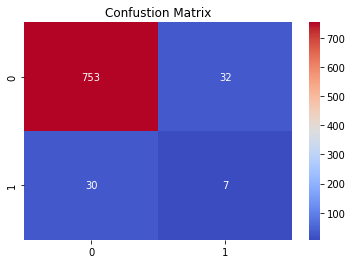

In [34]:
sns.heatmap(confusion_matrix(y_val, clfs.predict(X_val)), annot = True, cmap = 'coolwarm', fmt='g')
plt.title('Confustion Matrix')
plt.show()

# Psudo Labeling

In [35]:
predp = clf.predict_proba(X_test)[:,1]
test['predp'] = predp
test.head()

,Id,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,Buy,V2_fq_enc,V3_fq_enc,V4_fq_enc,V5_fq_enc,V7_fq_enc,V8_fq_enc,V9_fq_enc,V10_fq_enc,V11_fq_enc,V12_fq_enc,V13_fq_enc,V14_fq_enc,V15_fq_enc,V16_fq_enc,V17_fq_enc,V18_fq_enc,V19_fq_enc,V20_fq_enc,V21_fq_enc,V22_fq_enc,V23_fq_enc,V24_fq_enc,V25_fq_enc,V26_fq_enc,V27_fq_enc,V28_fq_enc,V29_fq_enc,V30_fq_enc,V31_fq_enc,V33_fq_enc,V34_fq_enc,V35_fq_enc,V36_fq_enc,V38_fq_enc,V39_fq_enc,V40_fq_enc,V41_fq_enc,V42_fq_enc,V43_fq_enc,V44_fq_enc,V45_fq_enc,V46_fq_enc,V47_fq_enc,V48_fq_enc,V49_fq_enc,V50_fq_enc,V51_fq_enc,V52_fq_enc,V53_fq_enc,V54_fq_enc,V55_fq_enc,V56_fq_enc,V57_fq_enc,V58_fq_enc,V59_fq_enc,V60_fq_enc,V61_fq_enc,V62_fq_enc,V63_fq_enc,V64_fq_enc,V65_fq_enc,V67_fq_enc,V69_fq_enc,V70_fq_enc,V71_fq_enc,V74_fq_enc,V75_fq_enc,V77_fq_enc,V78_fq_enc,V81_fq_enc,V82_fq_enc,V83_fq_enc,V84_fq_enc,V85_fq_enc,predp
0,5,38,0,3,1,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN,0.012195,0.904672,0.119031,0.249399,0.274648,0.276022,0.345929,0.229131,0.289076,0.348677,0.301615,0.214188,0.249914,0.195294,0.032120,0.244933,0.051357,0.261766,0.008932,0.013226,0.114565,0.200447,0.166266,0.009619,0.232394,0.170045,0.062521,0.447784,0.088801,0.285641,0.300240,0.133288,0.167296,0.223978,0.079869,0.015630,0.557540,0.841635,0.060976,0.261766,0.598076,0.985915,0.979389,0.488664,0.991755,0.961869,0.998454,0.988835,0.975438,0.996393,0.931982,0.949674,0.994675,0.993473,0.996049,0.026623,0.999485,0.994332,0.974751,0.992271,0.985915,0.985915,0.488664,0.991755,0.961869,0.975438,0.996393,0.949674,0.994675,0.518207,0.999485,0.994332,0.974751,0.992271,0.495418
1,14,39,0,2,2,10,0,5,0,4,7,1,1,1,4,5,2,4,4,3,0,1,2,2,2,4,2,1,4,0,5,4,7,2,0,8,1,3,2,4,1,0,4,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.035211,0.904672,0.454483,0.515287,0.554449,0.257815,0.344040,0.229131,0.289076,0.348677,0.092580,0.163346,0.249914,0.189969,0.196496,0.244933,0.146170,0.129852,0.716420,0.146685,0.256098,0.237375,0.247166,0.044830,0.306252,0.147887,0.199072,0.447784,0.089145,0.242700,0.300240,0.249055,0.120062,0.185332,0.157850,0.177602,0.233425,0.841635,0.318447,0.154930,0.598076,0.985915,0.979389,0.488664,0.991755,0.961869,0.998454,0.988835,0.975438,0.996393,0.931982,0.949674,0.994675,0.993473,0.996049,0.457918,0.999485,0.994332,0.974751,0.992271,0.985915,0.985915,0.488664,0.991755,0.961869,0.975438,0.996393,0.949674,0.994675,0.457918,0.999485,0.994332,0.974751,0.992271,0.496146
2,16,31,0,1,2,8,0,7,0,2,7,2,0,0,5,4,0,3,6,2,0,0,2,5,2,2,1,2,5,2,0,9,4,4,2,6,3,2,5,3,0,0,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN,0.139127,0.904672,0.366025,0.515287,0.554449,0.096874,0.344040,0.181209,0.289076,0.184644,0.201477,0.301786,0.104088,0.195294,0.368774,0.228444,0.147029,0.234284,0.716420,0.717279,0.256098,0.053246,0.247166,0.205771,0.254208,0.287874,0.200618,0.146341,0.163002,0.076950,0.051700,0.279114,0.150292,0.187908,0.159911,0.208691,0.557540,0.841635,0.331845,0.261766,0.365510,0.985915,0.979389,0.488664,0.991755,0.961869,0.998454,0.988835,0.975438,0.996393,0.931982,0.949674,0.994675,0.993473,0.996049,0.210581,0.999485,0.994332,0.974751,0.992271,0.985915,0.985915,0.488664,0.991755,0.961869,0.975438,0.996393,0.949674,0.994675,0.518207,0.999485,0.994332,0.974751,0.992271,0.496173
3,26,31,0,2,2,8,0,6,1,2,6,0,3,2,3,5,1,2,6,1,0,1,4,2,4,1,2,2,5,2,2,7,7,0,2,7,2,0,4,5,0,0,4,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN,0.139127,0.904672,0.454483,0.515287,0.554449,0.122638,0.345929,0.181209,0.201305,0.420474,0.197870,0.

In [36]:
# only use 80 obs for psudo labeling
test[test.predp>0.5].shape

(398, 162)

In [37]:
psudo_idx = test.sort_values(by = 'predp',ascending = False).head(30).index
print(psudo_idx.shape)

(30,)


In [38]:
train.head(2)

,Id,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,Buy,V2_fq_enc,V3_fq_enc,V4_fq_enc,V5_fq_enc,V7_fq_enc,V8_fq_enc,V9_fq_enc,V10_fq_enc,V11_fq_enc,V12_fq_enc,V13_fq_enc,V14_fq_enc,V15_fq_enc,V16_fq_enc,V17_fq_enc,V18_fq_enc,V19_fq_enc,V20_fq_enc,V21_fq_enc,V22_fq_enc,V23_fq_enc,V24_fq_enc,V25_fq_enc,V26_fq_enc,V27_fq_enc,V28_fq_enc,V29_fq_enc,V30_fq_enc,V31_fq_enc,V33_fq_enc,V34_fq_enc,V35_fq_enc,V36_fq_enc,V38_fq_enc,V39_fq_enc,V40_fq_enc,V41_fq_enc,V42_fq_enc,V43_fq_enc,V44_fq_enc,V45_fq_enc,V46_fq_enc,V47_fq_enc,V48_fq_enc,V49_fq_enc,V50_fq_enc,V51_fq_enc,V52_fq_enc,V53_fq_enc,V54_fq_enc,V55_fq_enc,V56_fq_enc,V57_fq_enc,V58_fq_enc,V59_fq_enc,V60_fq_enc,V61_fq_enc,V62_fq_enc,V63_fq_enc,V64_fq_enc,V65_fq_enc,V67_fq_enc,V69_fq_enc,V70_fq_enc,V71_fq_enc,V74_fq_enc,V75_fq_enc,V77_fq_enc,V78_fq_enc,V81_fq_enc,V82_fq_enc,V83_fq_enc,V84_fq_enc,V85_fq_enc
0,1,31,0,2,1,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.139127,0.904672,0.454483,0.249399,0.554449,0.257815,0.345929,0.249571,0.289076,0.420474,0.301615,0.163346,0.182068,0.134490,0.227070,0.160941,0.109928,0.213844,0.71642,0.146685,0.256098,0.053246,0.247166,0.269495,0.254208,0.287874,0.083648,0.268464,0.073514,0.04483,0.318447,0.133288,0.120062,0.223978,0.232910,0.085538,0.557540,0.841635,0.318447,0.261766,0.598076,0.985915,0.979389,0.398317,0.991755,0.961869,0.998454,0.988835,0.975438,0.996393,0.931982,0.949674,0.994675,0.993473,0.996049,0.025593,0.999485,0.994332,0.974751,0.992271,0.985915,0.985915,0.465819,0.991755,0.961869,0.975438,0.996393,0.949674,0.994675,0.518207,0.999485,0.994332,0.974751,0.992271
1,2,35,0,1,1,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.022673,0.904672,0.366025,0.249399,0.274648,0.276022,0.345929,0.229131,0.201305,0.184644,0.301615,0.301786,0.249914,0.189969,0.368774,0.126761,0.146170,0.261766,0.71642,0.717279,0.074030,0.200447,0.132600,0.298523,0.306252,0.201821,0.200618,0.447784,0.123154,0.24270,0.252147,0.279114,0.150292,0.187908,0.079869,0.085538,0.126417,0.841635,0.125902,0.154930,0.365510,0.985915,0.979389,0.488664,0.991755,0.961869,0.998454,0.988835,0.975438,0.996393,0.931982,0.949674,0.994675,0.993473,0.996049,0.091893,0.999485,0.994332,0.974751,0.992271,0.985915,0.985915,0.488664,0.991755,0.961869,0.975438,0.996393,0.949674,0.994675,0.518207,0.999485,0.994332,0.974751,0.992271


In [39]:
train.shape

(4107, 161)

In [40]:
psudo_test = test.iloc[psudo_idx]

psudo_test['Buy'] = 1
psudo_test = psudo_test.drop('predp', axis = 1)
print(psudo_test.shape)
psudo_test.head(2)

(30, 161)


,Id,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,Buy,V2_fq_enc,V3_fq_enc,V4_fq_enc,V5_fq_enc,V7_fq_enc,V8_fq_enc,V9_fq_enc,V10_fq_enc,V11_fq_enc,V12_fq_enc,V13_fq_enc,V14_fq_enc,V15_fq_enc,V16_fq_enc,V17_fq_enc,V18_fq_enc,V19_fq_enc,V20_fq_enc,V21_fq_enc,V22_fq_enc,V23_fq_enc,V24_fq_enc,V25_fq_enc,V26_fq_enc,V27_fq_enc,V28_fq_enc,V29_fq_enc,V30_fq_enc,V31_fq_enc,V33_fq_enc,V34_fq_enc,V35_fq_enc,V36_fq_enc,V38_fq_enc,V39_fq_enc,V40_fq_enc,V41_fq_enc,V42_fq_enc,V43_fq_enc,V44_fq_enc,V45_fq_enc,V46_fq_enc,V47_fq_enc,V48_fq_enc,V49_fq_enc,V50_fq_enc,V51_fq_enc,V52_fq_enc,V53_fq_enc,V54_fq_enc,V55_fq_enc,V56_fq_enc,V57_fq_enc,V58_fq_enc,V59_fq_enc,V60_fq_enc,V61_fq_enc,V62_fq_enc,V63_fq_enc,V64_fq_enc,V65_fq_enc,V67_fq_enc,V69_fq_enc,V70_fq_enc,V71_fq_enc,V74_fq_enc,V75_fq_enc,V77_fq_enc,V78_fq_enc,V81_fq_enc,V82_fq_enc,V83_fq_enc,V84_fq_enc,V85_fq_enc
610,2154,7,0,1,3,2,0,4,0,5,7,0,2,2,6,2,3,5,1,6,1,0,2,0,1,6,0,2,2,0,6,3,7,2,0,3,6,2,4,4,1,0,5,6,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.058227,0.904672,0.366025,0.184301,0.554449,0.276022,0.344040,0.165407,0.289076,0.420474,0.301615,0.214188,0.055136,0.109069,0.093954,0.126761,0.041738,0.023703,0.206458,0.717279,0.256098,0.200447,0.168327,0.016489,0.232394,0.287874,0.149433,0.447784,0.065613,0.2427,0.300240,0.249055,0.030402,0.187908,0.23291,0.177602,0.233425,0.841635,0.125902,0.081415,0.36551,0.985915,0.979389,0.398317,0.991755,0.961869,0.998454,0.988835,0.975438,0.996393,0.931982,0.949674,0.994675,0.993473,0.996049,0.210581,0.999485,0.994332,0.974751,0.992271,0.985915,0.985915,0.465819,0.991755,0.961869,0.975438,0.996393,0.949674,0.994675,0.518207,0.999485,0.994332,0.974751,0.992271
202,662,7,0,2,2,2,1,5,1,3,7,1,2,0,2,7,5,3,2,3,1,0,4,2,1,4,3,2,2,1,1,8,7,0,2,5,4,1,2,4,3,1,6,6,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.058227,0.904672,0.454483,0.515287,0.274648,0.257815,0.345929,0.249571,0.289076,0.348677,0.301615,0.301786,0.182068,0.060289,0.032120,0.228444,0.114565,0.129852,0.206458,0.717279,0.163689,0.237375,0.168327,0.044830,0.133116,0.287874,0.149433,0.268464,0.073514,0.2427,0.318447,0.279114,0.167296,0.108210,0.15785,0.177602,0.042254,0.131055,0.060976,0.081415,0.36551,0.985915,0.979389,0.398317,0.991755,0.961869,0.998454,0.988835,0.975438,0.996393,0.931982,0.949674,0.994675,0.993473,0.996049,0.210581,0.999485,0.994332,0.974751,0.992271,0.985915,0.985915,0.465819,0.991755,0.961869,0.975438,0.996393,0.949674,0.994675,0.518207,0.999485,0.994332,0.974751,0.992271


In [41]:
train_new = pd.concat([train, psudo_test])
print(train_new.shape)
train_new.head(2)

(4137, 161)


,Id,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,Buy,V2_fq_enc,V3_fq_enc,V4_fq_enc,V5_fq_enc,V7_fq_enc,V8_fq_enc,V9_fq_enc,V10_fq_enc,V11_fq_enc,V12_fq_enc,V13_fq_enc,V14_fq_enc,V15_fq_enc,V16_fq_enc,V17_fq_enc,V18_fq_enc,V19_fq_enc,V20_fq_enc,V21_fq_enc,V22_fq_enc,V23_fq_enc,V24_fq_enc,V25_fq_enc,V26_fq_enc,V27_fq_enc,V28_fq_enc,V29_fq_enc,V30_fq_enc,V31_fq_enc,V33_fq_enc,V34_fq_enc,V35_fq_enc,V36_fq_enc,V38_fq_enc,V39_fq_enc,V40_fq_enc,V41_fq_enc,V42_fq_enc,V43_fq_enc,V44_fq_enc,V45_fq_enc,V46_fq_enc,V47_fq_enc,V48_fq_enc,V49_fq_enc,V50_fq_enc,V51_fq_enc,V52_fq_enc,V53_fq_enc,V54_fq_enc,V55_fq_enc,V56_fq_enc,V57_fq_enc,V58_fq_enc,V59_fq_enc,V60_fq_enc,V61_fq_enc,V62_fq_enc,V63_fq_enc,V64_fq_enc,V65_fq_enc,V67_fq_enc,V69_fq_enc,V70_fq_enc,V71_fq_enc,V74_fq_enc,V75_fq_enc,V77_fq_enc,V78_fq_enc,V81_fq_enc,V82_fq_enc,V83_fq_enc,V84_fq_enc,V85_fq_enc
0,1,31,0,2,1,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.139127,0.904672,0.454483,0.249399,0.554449,0.257815,0.345929,0.249571,0.289076,0.420474,0.301615,0.163346,0.182068,0.134490,0.227070,0.160941,0.109928,0.213844,0.71642,0.146685,0.256098,0.053246,0.247166,0.269495,0.254208,0.287874,0.083648,0.268464,0.073514,0.04483,0.318447,0.133288,0.120062,0.223978,0.232910,0.085538,0.557540,0.841635,0.318447,0.261766,0.598076,0.985915,0.979389,0.398317,0.991755,0.961869,0.998454,0.988835,0.975438,0.996393,0.931982,0.949674,0.994675,0.993473,0.996049,0.025593,0.999485,0.994332,0.974751,0.992271,0.985915,0.985915,0.465819,0.991755,0.961869,0.975438,0.996393,0.949674,0.994675,0.518207,0.999485,0.994332,0.974751,0.992271
1,2,35,0,1,1,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.022673,0.904672,0.366025,0.249399,0.274648,0.276022,0.345929,0.229131,0.201305,0.184644,0.301615,0.301786,0.249914,0.189969,0.368774,0.126761,0.146170,0.261766,0.71642,0.717279,0.074030,0.200447,0.132600,0.298523,0.306252,0.201821,0.200618,0.447784,0.123154,0.24270,0.252147,0.279114,0.150292,0.187908,0.079869,0.085538,0.126417,0.841635,0.125902,0.154930,0.365510,0.985915,0.979389,0.488664,0.991755,0.961869,0.998454,0.988835,0.975438,0.996393,0.931982,0.949674,0.994675,0.993473,0.996049,0.091893,0.999485,0.994332,0.974751,0.992271,0.985915,0.985915,0.488664,0.991755,0.961869,0.975438,0.996393,0.949674,0.994675,0.518207,0.999485,0.994332,0.974751,0.992271


In [42]:
X_test.head(2)


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V2_fq_enc,V3_fq_enc,V4_fq_enc,V5_fq_enc,V7_fq_enc,V8_fq_enc,V9_fq_enc,V10_fq_enc,V11_fq_enc,V12_fq_enc,V13_fq_enc,V14_fq_enc,V15_fq_enc,V16_fq_enc,V17_fq_enc,V18_fq_enc,V19_fq_enc,V20_fq_enc,V21_fq_enc,V22_fq_enc,V23_fq_enc,V24_fq_enc,V25_fq_enc,V26_fq_enc,V27_fq_enc,V28_fq_enc,V29_fq_enc,V30_fq_enc,V31_fq_enc,V33_fq_enc,V34_fq_enc,V35_fq_enc,V36_fq_enc,V38_fq_enc,V39_fq_enc,V40_fq_enc,V41_fq_enc,V42_fq_enc,V43_fq_enc,V44_fq_enc,V45_fq_enc,V46_fq_enc,V47_fq_enc,V48_fq_enc,V49_fq_enc,V50_fq_enc,V51_fq_enc,V52_fq_enc,V53_fq_enc,V54_fq_enc,V55_fq_enc,V56_fq_enc,V57_fq_enc,V58_fq_enc,V59_fq_enc,V60_fq_enc,V61_fq_enc,V62_fq_enc,V63_fq_enc,V64_fq_enc,V65_fq_enc,V67_fq_enc,V69_fq_enc,V70_fq_enc,V71_fq_enc,V74_fq_enc,V75_fq_enc,V77_fq_enc,V78_fq_enc,V81_fq_enc,V82_fq_enc,V83_fq_enc,V84_fq_enc,V85_fq_enc
0,38,0,3,1,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.012195,0.904672,0.119031,0.249399,0.274648,0.276022,0.345929,0.229131,0.289076,0.348677,0.301615,0.214188,0.249914,0.195294,0.032120,0.244933,0.051357,0.261766,0.008932,0.013226,0.114565,0.200447,0.166266,0.009619,0.232394,0.170045,0.062521,0.447784,0.088801,0.285641,0.30024,0.133288,0.167296,0.223978,0.079869,0.015630,0.557540,0.841635,0.060976,0.261766,0.598076,0.985915,0.979389,0.488664,0.991755,0.961869,0.998454,0.988835,0.975438,0.996393,0.931982,0.949674,0.994675,0.993473,0.996049,0.026623,0.999485,0.994332,0.974751,0.992271,0.985915,0.985915,0.488664,0.991755,0.961869,0.975438,0.996393,0.949674,0.994675,0.518207,0.999485,0.994332,0.974751,0.992271
1,39,0,2,2,10,0,5,0,4,7,1,1,1,4,5,2,4,4,3,0,1,2,2,2,4,2,1,4,0,5,4,7,2,0,8,1,3,2,4,1,0,4,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.035211,0.904672,0.454483,0.515287,0.554449,0.257815,0.344040,0.229131,0.289076,0.348677,0.092580,0.163346,0.249914,0.189969,0.196496,0.244933,0.146170,0.129852,0.716420,0.146685,0.256098,0.237375,0.247166,0.044830,0.306252,0.147887,0.199072,0.447784,0.089145,0.242700,0.30024,0.249055,0.120062,0.185332,0.157850,0.177602,0.233425,0.841635,0.318447,0.154930,0.598076,0.985915,0.979389,0.488664,0.991755,0.961869,0.998454,0.988835,0.975438,0.996393,0.931982,0.949674,0.994675,0.993473,0.996049,0.457918,0.999485,0.994332,0.974751,0.992271,0.985915,0.985915,0.488664,0.991755,0.961869,0.975438,0.996393,0.949674,0.994675,0.457918,0.999485,0.994332,0.974751,0.992271


In [43]:
X_train = train_new.drop(['Id','Buy'], axis = 1)
y_train = train_new.Buy

#X_test = test.drop(['Id', 'Buy'], axis = 1)
print(X_train.shape)
print(X_test.shape)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train,test_size = 0.2, shuffle = True, random_state = 22)
print(X_tr.shape)
print(X_val.shape)
print(y_tr.shape)
print(y_val.shape)

(4137, 159)
(1715, 159)
(3309, 159)
(828, 159)
(3309,)
(828,)


# LGBM with Balanced

In [44]:
clf = lgb.LGBMClassifier(
learning_rate = 0.0001,
    n_estimators = 1000,
    subsample = 0.8,
    colsample_bytree = 0.5,
    reg_alpha = 0.5,
    reg_lambda = 0.5,
    importance_type= 'gain',
    class_weight = 'balanced',

)

clf.fit(X_tr, y_tr, eval_set = [(X_tr, y_tr),(X_val, y_val)], early_stopping_rounds= 200, categorical_feature = fea,
       verbose=50, eval_metric= 'auc')

[50]	training's auc: 0.938895	training's binary_logloss: 0.691058	valid_1's auc: 0.821682	valid_1's binary_logloss: 0.691198
[100]	training's auc: 0.941102	training's binary_logloss: 0.68903	valid_1's auc: 0.824002	valid_1's binary_logloss: 0.689311
[150]	training's auc: 0.941409	training's binary_logloss: 0.686995	valid_1's auc: 0.823201	valid_1's binary_logloss: 0.687427
[200]	training's auc: 0.941728	training's binary_logloss: 0.684966	valid_1's auc: 0.822686	valid_1's binary_logloss: 0.685533


LGBMClassifier(class_weight='balanced', colsample_bytree=0.5,
               importance_type='gain', learning_rate=0.0001, n_estimators=1000,
               reg_alpha=0.5, reg_lambda=0.5, subsample=0.8)

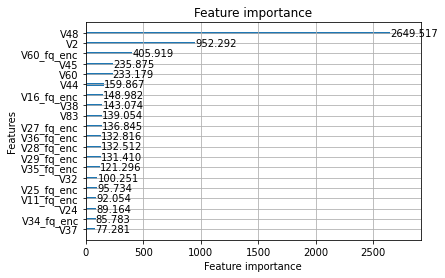

In [45]:
lgb.plot_importance(clf, max_num_features=20)

plt.show()

In [46]:
print('accuracy score: \n', accuracy_score(y_val, clf.predict(X_val)), '\n')

print('auc score: \n', roc_auc_score(y_val, clf.predict_proba(X_val)[:,1]), '\n')

print('classification report \n', classification_report(y_val, clf.predict(X_val)), '\n')

print('confusion matrix \n', confusion_matrix(y_val, clf.predict(X_val)), '\n')

accuracy score: 
 0.7898550724637681 

auc score: 
 0.8337161450856542 

classification report 
               precision    recall  f1-score   support

         0.0       0.97      0.80      0.88       774
         1.0       0.18      0.65      0.29        54

    accuracy                           0.79       828
   macro avg       0.58      0.72      0.58       828
weighted avg       0.92      0.79      0.84       828
 

confusion matrix 
 [[619 155]
 [ 19  35]] 



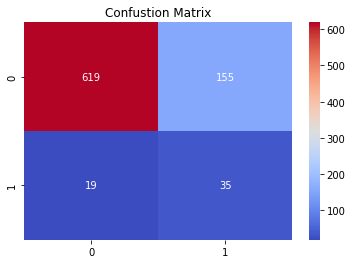

In [47]:
sns.heatmap(confusion_matrix(y_val, clf.predict(X_val)), annot = True, cmap = 'coolwarm', fmt='g')
plt.title('Confustion Matrix')
plt.show()

# Submission

In [48]:
pred = clf.predict(X_test)
#(lr.predict_proba(X_test)[:,1] + clf.predict_proba(X_test)[:,1])/2
#+  clfs.predict_proba(X_test)[:,1])/3
#pred = [1 if x>=0.5 else 0 for x in pred]

sub.Predicted = pred
sub

,Id,Predicted
0,5,0.0
1,14,0.0
2,16,0.0
3,26,0.0
4,28,0.0
...,...,...
1710,5801,1.0
1711,5803,0.0
1712,5808,1.0
1713,5817,1.0


In [49]:
sub.Predicted.describe()

count    1715.000000
mean        0.230904
std         0.421534
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Predicted, dtype: float64

In [50]:
sub.to_csv('sub.csv', index = False)

In [51]:
sub.Predicted.value_counts()

0.0    1319
1.0     396
Name: Predicted, dtype: int64

In [52]:
train.Buy.value_counts()

0.0    3859
1.0     248
Name: Buy, dtype: int64